In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
iris=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [ ]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
label_encoder=preprocessing.LabelEncoder()
iris.species=label_encoder.fit_transform(iris.species)

In [ ]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [55]:
#TRAINING AND TESTING THE DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [56]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [57]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: species, Length: 120, dtype: int64

***DECISION TREE CLASSIFIER***

In [58]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

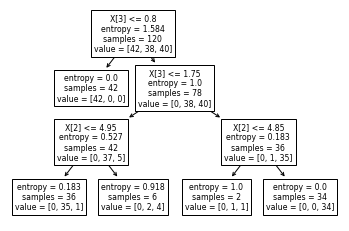

In [59]:
tree.plot_tree(model);

In [60]:
y_train.value_counts().keys()

Int64Index([0, 2, 1], dtype='int64')

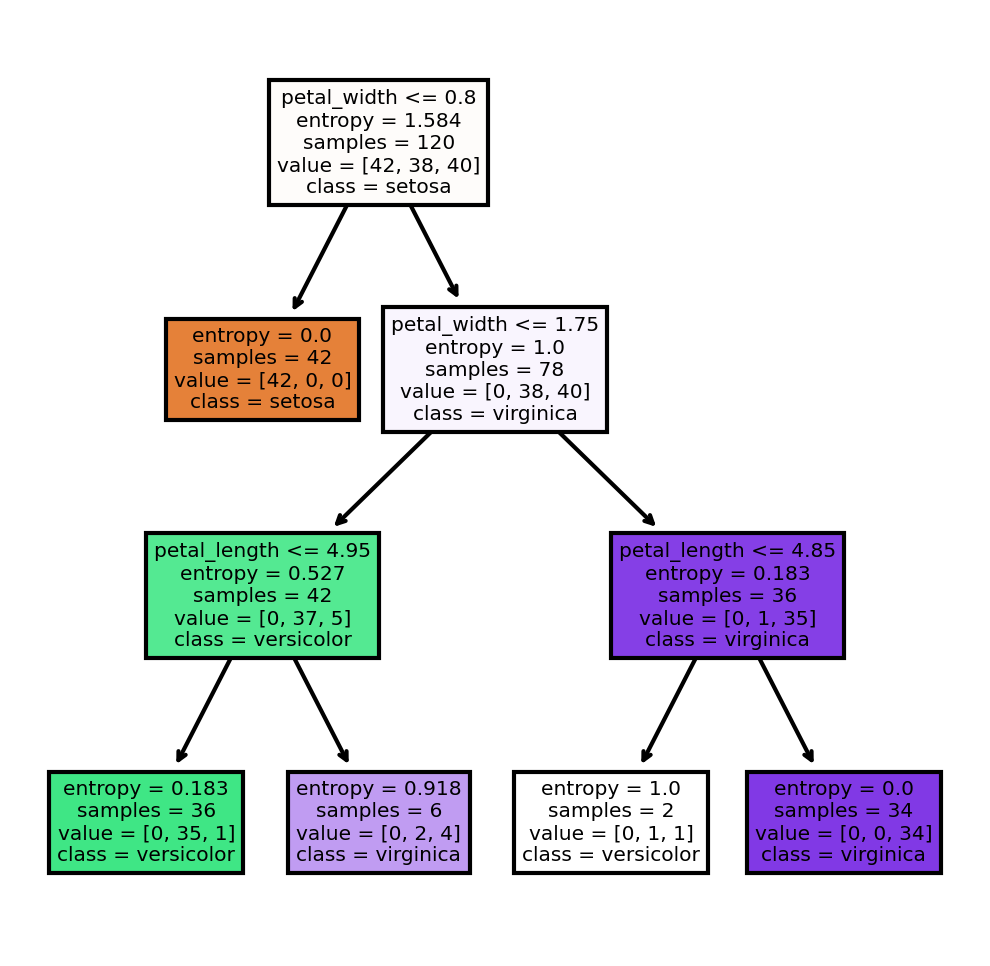

In [61]:
fn=iris.columns
cn=['setosa', 'versicolor', 'virginica']   
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [62]:

preds = model.predict(x_test) 
pd.Series(preds).value_counts() 

1    13
2     9
0     8
dtype: int64

In [63]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [64]:
pd.crosstab(y_test,preds) 

col_0,0,1,2
species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [65]:

np.mean(preds==y_test)

0.9666666666666667

DECISION TREE REGRESSION

In [83]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [87]:
array = iris.values
x = array[:,0:3]
y = array[:,3]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [89]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [90]:
#ACCURACY
model.score(x_test,y_test)

0.875810421419138